In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [18]:
df = pd.read_csv(r"Bond-VN.csv", index_col= 0,parse_dates=True)

y = df.GGVF1Y
x = df[['GGVF5Y','CPI','FER','Baserate','FIR', 'Stockreturn','Fiscal', 'Pubdebt', 'CurrentAcc']]

In [19]:
n_state = 50
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state=n_state) 

# Decision Tree Regressor

In [20]:
decision_tree = DecisionTreeRegressor(random_state=n_state)
decision_tree.fit(x_train, y_train);

In [21]:
pred_decision_tree = decision_tree.predict(x_test)
result_decision_tree = pd.DataFrame({'Real': y_test, 'Prediction': pred_decision_tree})
result_decision_tree.sort_index(inplace=True)
result_decision_tree.head(7)

,Real,Prediction
Time,,
2007-07-01,0.06975,0.07534
2007-11-01,0.07733,0.07793
2008-03-01,0.07430,0.07513
2008-06-01,0.21167,0.16580
2008-08-01,0.16814,0.20425
2009-05-01,0.08435,0.08472
2009-09-01,0.09145,0.08688


In [22]:
result_decision_tree.to_excel('Decision_tree.xlsx')

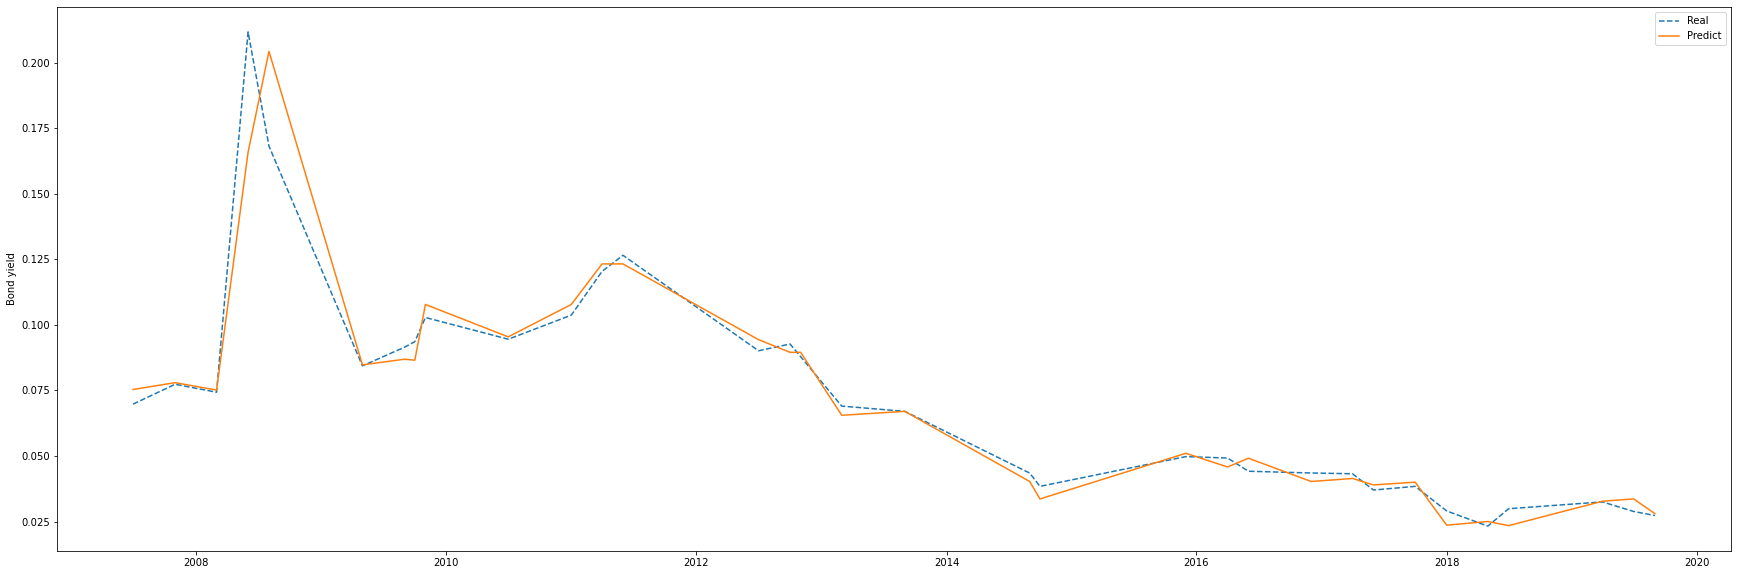

In [23]:
plt.figure(figsize=(30,10))

plt.plot(result_decision_tree.Real,'--')
plt.plot(result_decision_tree.Prediction)

plt.legend(['Real','Predict'])

plt.ylabel('Bond yield')

plt.show()

In [24]:
rmse = np.sqrt(mean_squared_error(result_decision_tree.Real, result_decision_tree.Prediction))
mae = mean_absolute_error(result_decision_tree.Real, result_decision_tree.Prediction)
mape = (mean_absolute_percentage_error(result_decision_tree.Real, result_decision_tree.Prediction))*100

In [25]:
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.010736825189576063
MAE  = 0.00531121212121212
MAPE = 6.83%


# Random Forest Regressor

In [26]:
random_forest = RandomForestRegressor(random_state = n_state)
random_forest.fit(x_train, y_train);

random_forest_pred = random_forest.predict(x_test)

In [27]:
result_random_forest = pd.DataFrame({'Real': y_test, 'Prediction': random_forest_pred})
result_random_forest.sort_index(inplace=True)
result_random_forest.head(7)

,Real,Prediction
Time,,
2007-07-01,0.06975,0.070861
2007-11-01,0.07733,0.073819
2008-03-01,0.07430,0.075402
2008-06-01,0.21167,0.177118
2008-08-01,0.16814,0.179186
2009-05-01,0.08435,0.083885
2009-09-01,0.09145,0.088599


In [28]:
result_random_forest.to_excel('Random_forest.xlsx')

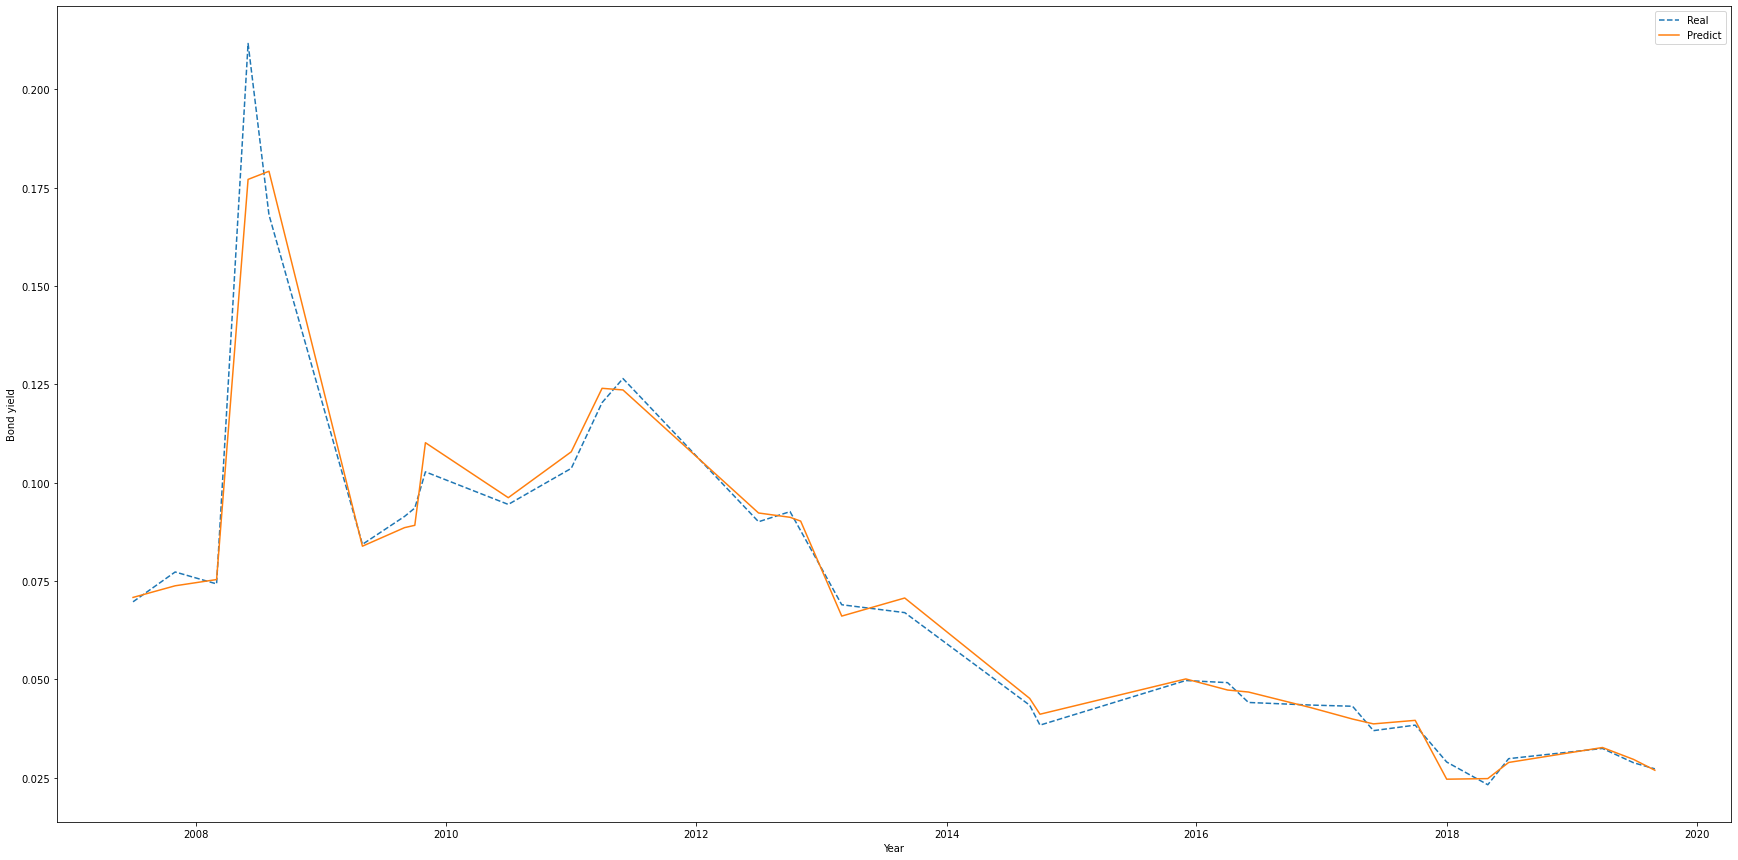

In [29]:
plt.figure(figsize=(30,15))

plt.plot(result_random_forest.Real,'--')
plt.plot(result_random_forest.Prediction)

plt.legend(['Real','Predict'])

plt.xlabel('Year')
plt.ylabel('Bond yield')
plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(result_random_forest.Real, result_random_forest.Prediction))
mae = mean_absolute_error(result_random_forest.Real, result_random_forest.Prediction)
mape = (mean_absolute_percentage_error(result_random_forest.Real, result_random_forest.Prediction))*100

In [31]:
print(f'RMSE = {rmse}')
print(f'MAE  = {mae}')
print(f'MAPE = {round(mape,2)}%')


RMSE = 0.006854912709189361
MAE  = 0.0035216515151515106
MAPE = 4.32%
